In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Activation Functions

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
    

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

##### Dataset visualization

In [21]:
points = np.genfromtxt('data/two-circles.csv', delimiter=',')
points = points[1:len(points)]
x      = points[:,0]
y      = points[:,1]
labels = points[:,2]
plt.figure(figsize=(5,2))
plt.scatter(x, y, c=labels, s=1)
plt.show()

### Task 0

In [22]:
inputs  = np.column_stack((x, y))
outputs = labels.reshape(-1, 1)



print("Inputs shape: ", inputs.shape)
print("Outputs shape: ", outputs.shape)

print("Cluster 0: ", len(outputs[outputs == 0]))
print("Cluster 1: ", len(outputs[outputs == 1]))

Inputs shape:  (300, 2)
Outputs shape:  (300, 1)
Cluster 0:  100
Cluster 1:  100


In [23]:
def weights(input_size, output_size):
    weights_input_output = 2 * np.random.random((input_size, output_size)) - 1
    return weights_input_output

def bias(output_size):
    bias_output = np.random.randn(1, output_size)
    return bias_output


In [24]:
def plot_cost_graph(cost_graph,x,y, output_layer):
    
    plt.figure(figsize=(3, 2))
    plt.plot(cost_graph)
    plt.figure(figsize=(3, 2))
    plt.scatter(x, y, c=output_layer, s=1)
    plt.show()
    return min(cost_graph),cost_graph[-1]

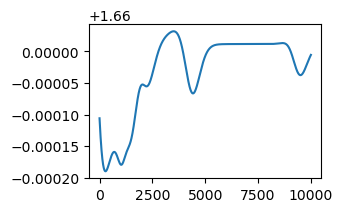

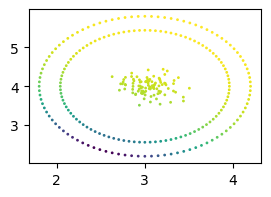

Minimum cost:  1.6598101118272144
Final cost:  1.6599944140549452


In [25]:
def algorithm_one_hidden_layers(inputs,outputs,h_n_size,epochs= 1000, lr=1):
    
    weights_input_hidden = weights(inputs.shape[1], h_n_size)
    weights_hidden_output = weights(h_n_size, outputs.shape[1])

    bias_hidden = bias(h_n_size)
    bias_output = bias(outputs.shape[1])
    cost_graph = []

    for epoch in range(10000):
        hidden_layer = sigmoid(np.dot(inputs, weights_input_hidden) +bias_hidden)
        output_layer = softmax(np.dot(hidden_layer, weights_hidden_output) +bias_output)

        output_error = outputs - output_layer
        cost_graph.append(np.mean(np.square(output_error)))
        output_delta = output_error * softmax_derivative(output_layer)
        hidden_delta = output_delta.dot(weights_hidden_output.T) *sigmoid_derivative(hidden_layer)
        weights_hidden_output += lr * hidden_layer.T.dot(output_delta)
        weights_input_hidden += lr * inputs.T.dot(hidden_delta)
        bias_output += lr * np.sum(output_delta, axis=0, keepdims=True)
        bias_hidden += lr * np.sum(hidden_delta, axis=0, keepdims=True)
       
    min_cost ,final_cost = plot_cost_graph(cost_graph, inputs[:, 0], inputs[:, 1], output_layer)
    print("Minimum cost: ", min_cost)
    print("Final cost: ", final_cost)
    return  output_layer


lr = 0.001
h_n_size = 24
output_layer = algorithm_one_hidden_layers(inputs, outputs, h_n_size, epochs=10000, lr=lr)




   

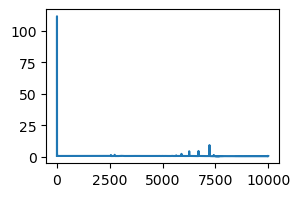

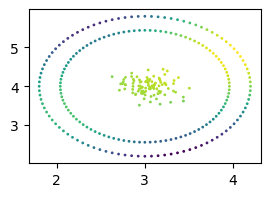

Minimum cost:  0.4247907137332548
Final cost:  0.5888041242365654


In [29]:
def reg_neural_network(inputs, outputs, h_n_size, epochs=1000, lr=0.001):
    weights_input_hidden = weights(inputs.shape[1], h_n_size)
    weights_hidden_output = weights(h_n_size, 1)
    bias_hidden = bias(h_n_size)
    bias_output = bias(1)
    cost_graph = []
    
    for epoch in range(epochs):
        hidden_layer = sigmoid(np.dot(inputs, weights_input_hidden) + bias_hidden)
        output_layer = np.dot(hidden_layer, weights_hidden_output) + bias_output
        
        output_error = outputs - output_layer
        cost = np.mean(np.square(output_error))
        cost_graph.append(cost)
        
        output_delta = output_error
        hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer)
        
        weights_hidden_output += lr * hidden_layer.T.dot(output_delta)
        weights_input_hidden += lr * inputs.T.dot(hidden_delta)
        bias_output += lr * np.sum(output_delta, axis=0, keepdims=True)
        bias_hidden += lr * np.sum(hidden_delta, axis=0, keepdims=True)
    
    min_cost, final_cost = plot_cost_graph(cost_graph, inputs[:, 0], inputs[:, 1], output_layer)
    print("Minimum cost: ", min_cost)
    print("Final cost: ", final_cost)
    
    return output_layer


output_layer = reg_neural_network(inputs, outputs, 20, epochs=10000, lr=lr)




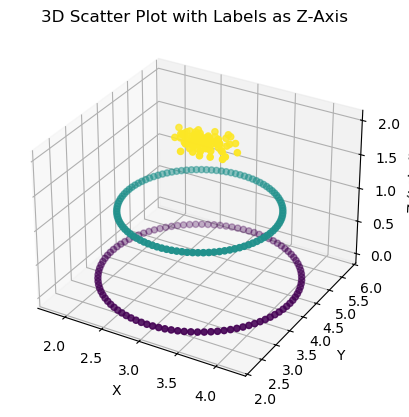

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs[:, 0], inputs[:, 1], outputs[:, 0], c=outputs[:, 0], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Label)')
plt.title('3D Scatter Plot with Labels as Z-Axis')
plt.show()